INSTALL DEPENDENCIES

In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


KEYPONTS USING MP HOLSTICE

In [2]:
mp_holistic=mp.solutions.holistic #holstic model
mp_drawing=mp.solutions.drawing_utils #drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
#render the results(landmark visualizations) on the image(current frame) so we can see different landmarks
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections



In [5]:
def draw_styled_landmarks(image, results):
    
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))# Draw face connections 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(120,120,22),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,21),thickness=4,circle_radius=2)) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,100,10),thickness=4,circle_radius=2),
                              mp_drawing.DrawingSpec(color=(90,122,122),thickness=4,circle_radius=2)) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,110,110),thickness=4,circle_radius=2),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=4,circle_radius=2)) # Draw right hand connections



In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.face_landmarks.landmark)#if we don't have any left hand landmarks then we need to return a 1 d array of size 21*3 i.e,63

468

In [8]:
(results.face_landmarks.landmark[0])

x: 0.4308660924434662
y: 0.770702064037323
z: -0.038351353257894516

In [9]:
draw_landmarks(frame, results)

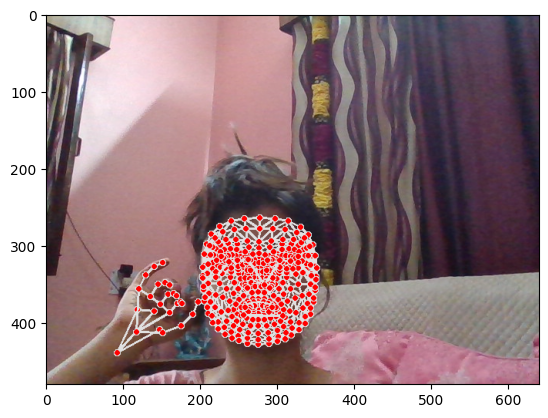

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [11]:
'''
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)
    #here the output is a list
'''

'\npose=[]\nfor res in results.pose_landmarks.landmark:\n    test=np.array([res.x,res.y,res.z,res.visibility])\n    pose.append(test)\n    #here the output is a list\n'

In [12]:
#(pose)

In [17]:
#using list comprehension here the output is an array
def extract_keypoints(results):
 pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
 face = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(468*3)
 lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
 rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
 return np.concatenate([pose,face,lh,rh])#keypoints flatten array


In [19]:
result_test=extract_keypoints(results)

In [20]:
print(result_test)

[ 4.43237484e-01  7.32072532e-01 -1.08252990e+00  9.99656379e-01
  4.74721581e-01  6.65835559e-01 -1.00451958e+00  9.99464035e-01
  4.95686620e-01  6.68189645e-01 -1.00475335e+00  9.99236405e-01
  5.12179852e-01  6.71830952e-01 -1.00477195e+00  9.99173582e-01
  4.09578323e-01  6.64308906e-01 -9.96052265e-01  9.99640167e-01
  3.88863266e-01  6.66080654e-01 -9.95390117e-01  9.99637067e-01
  3.71497333e-01  6.69663668e-01 -9.95694637e-01  9.99760389e-01
  5.38909137e-01  7.08156526e-01 -5.13828695e-01  9.99129713e-01
  3.45204383e-01  7.10444689e-01 -4.47206259e-01  9.99825597e-01
  4.80396122e-01  8.16220105e-01 -9.05485809e-01  9.99531209e-01
  4.00159836e-01  8.14051390e-01 -8.88561547e-01  9.99759316e-01
  6.49958491e-01  1.02547455e+00 -2.63617545e-01  9.72183466e-01
  2.07595661e-01  1.02059841e+00 -2.40844458e-01  9.98431206e-01
  7.91387916e-01  1.44554627e+00 -3.58113825e-01  7.53573999e-02
 -7.72288591e-02  1.30246675e+00 -9.42667842e-01  9.85734701e-01
  7.19860137e-01  1.57748

In [23]:
np.save('0',result_test)

In [24]:
np.load('0.npy')

array([ 4.43237484e-01,  7.32072532e-01, -1.08252990e+00,  9.99656379e-01,
        4.74721581e-01,  6.65835559e-01, -1.00451958e+00,  9.99464035e-01,
        4.95686620e-01,  6.68189645e-01, -1.00475335e+00,  9.99236405e-01,
        5.12179852e-01,  6.71830952e-01, -1.00477195e+00,  9.99173582e-01,
        4.09578323e-01,  6.64308906e-01, -9.96052265e-01,  9.99640167e-01,
        3.88863266e-01,  6.66080654e-01, -9.95390117e-01,  9.99637067e-01,
        3.71497333e-01,  6.69663668e-01, -9.95694637e-01,  9.99760389e-01,
        5.38909137e-01,  7.08156526e-01, -5.13828695e-01,  9.99129713e-01,
        3.45204383e-01,  7.10444689e-01, -4.47206259e-01,  9.99825597e-01,
        4.80396122e-01,  8.16220105e-01, -9.05485809e-01,  9.99531209e-01,
        4.00159836e-01,  8.14051390e-01, -8.88561547e-01,  9.99759316e-01,
        6.49958491e-01,  1.02547455e+00, -2.63617545e-01,  9.72183466e-01,
        2.07595661e-01,  1.02059841e+00, -2.40844458e-01,  9.98431206e-01,
        7.91387916e-01,  

SETTING UP FOLDERS FOR COLLECTION

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

mp_data folder->individual action folder->30 different sequrnces->for each sequence 30 different frames per video

In [22]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
            

COLLECT KEYPOINTS FOR TRAINING AND TESTING

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #for every action 30 different sequences each sequence containing 30 different frames
    #loop through actions
    for action in actions:
        #loop through sequnces aka videos
        for sequence in range(no_sequences):
           #loop through video length aka sequnce length
            for frame_num in range(sequnce_length):            
              # Read feed
              ret, frame = cap.read()

              # Make detections
              image, results = mediapipe_detection(frame, holistic)
              print(results)
        
              # Draw landmarks
              draw_styled_landmarks(image, results)

              # Show to screen
              cv2.imshow('OpenCV Feed', image)

             # Break gracefully
             if cv2.waitKey(10) & 0xFF == ord('q'):
               break
    cap.release()
    cv2.destroyAllWindows()